In [153]:
import numpy as np
import sklearn
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[10,5])
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from time import clock
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from collections import defaultdict, Counter
# from helpers import cluster_acc, myGMM,nn_arch,nn_reg
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import sys
from sklearn.metrics import accuracy_score, homogeneity_score

In [154]:
wine_dataset = pd.read_csv("wine_dataset.csv")
wine_dataset.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
0,1,13.761443,0.972960,2.191146,14.349954,106.525734,2.288580,2.584551,0.418044,1.862804,3.086808,1.169861,2.819086,850.678431
1,2,11.897923,1.297780,2.199666,17.478054,104.205421,2.716657,1.855066,0.318077,1.029640,9.103668,1.353718,2.780333,332.922006
2,3,12.659632,1.748552,2.438597,21.584696,88.079451,1.919476,0.681341,0.538078,1.327974,8.803633,0.643678,1.569951,633.531687
3,1,13.054828,1.817559,1.893926,15.390157,108.589893,2.662509,2.815723,0.278535,1.473812,6.386732,0.820398,3.694865,880.103325
4,3,11.769431,3.017528,3.013448,17.081528,86.525235,2.224963,0.846229,0.286065,1.644007,10.383464,0.734288,2.747013,475.152492


In [155]:
np.random.seed(44)
ufc_dataset = pd.read_csv("ufc_data.csv")
ufc_dataset.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.20000

In [156]:
# red is 1, blue is 0
# drop the no_of_rounds because unknown in the beginning
ufc_dataset.loc[ufc_dataset["Winner"] == "Red", "Winner"] = 1
ufc_dataset.loc[ufc_dataset["Winner"] == "Blue", "Winner"] = 0
ufc_dataset.drop(["no_of_rounds"], axis=1 ,inplace=True)
# al zero
ufc_dataset.drop(["B_draw"], axis=1 ,inplace=True)
ufc_dataset.drop(["R_draw"], axis=1 ,inplace=True)

In [157]:
ufc_dataset.head()

,Winner,title_bout,B_current_lose_streak,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1,True,0.0,4.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,167.64,170.18,135.0,0.0,4.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0

In [158]:
ufcX = ufc_dataset.drop("Winner", 1).copy().values
ufcY = ufc_dataset["Winner"].copy().values
wineX = wine_dataset.drop("class", 1).copy().values
wineY = wine_dataset["class"].copy().values

In [159]:
# normalize features for better performance 
min_max_scaler = preprocessing.MinMaxScaler()
ufcX = min_max_scaler.fit_transform(ufcX)
wineX = min_max_scaler.fit_transform(wineX)

In [160]:
clusters = list(range(2,31,1))

## UFC Dataset SSE Metric Elbow Method

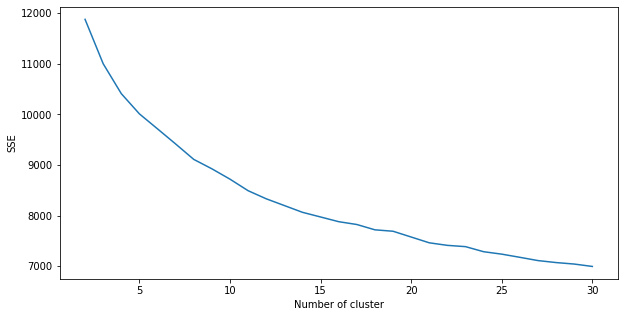

In [161]:
# ufc dataset
sse = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=44, n_jobs=-2).fit(ufcX)
    sse[cluster] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Wine DATASET SSE

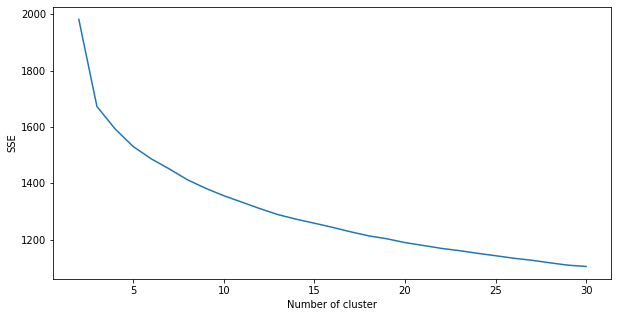

In [168]:
# wine dataset
sse_wine = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=44, n_jobs=-2).fit(wineX)
    sse_wine[cluster] = kmeans.inertia_
plt.figure()
plt.plot(list(sse_wine.keys()), list(sse_wine.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Check if the clusters align with the classes

In [40]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(ufcX)
accuracy_score((1-kmeans.labels_), ufcY)

0.5709910913140311

In [95]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(ufcX)
adjusted_mutual_info_score((1-kmeans.labels_), ufcY)

0.009201944378761939

In [54]:
# INTERESTING
kmeans = KMeans(n_clusters=3, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(wineX)
accuracy_score((kmeans.labels_+1), wineY)

0.9034

In [96]:
# INTERESTING
kmeans = KMeans(n_clusters=3, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(wineX)
adjusted_mutual_info_score((kmeans.labels_+1), wineY)

0.2983775357947125

## Silhuette and homogenity scores

For n_clusters=2, The Silhouette Coefficient is 0.12509174447772334
For n_clusters=2, The homogeneity_score is 0.0008529556471571547
For n_clusters=3, The Silhouette Coefficient is 0.1244846973617903
For n_clusters=3, The homogeneity_score is 0.0011112065802657525
For n_clusters=4, The Silhouette Coefficient is 0.0918851250724627
For n_clusters=4, The homogeneity_score is 0.005120238505029884
For n_clusters=5, The Silhouette Coefficient is 0.08684425047249238
For n_clusters=5, The homogeneity_score is 0.005712919216198488
For n_clusters=6, The Silhouette Coefficient is 0.08869444712740601
For n_clusters=6, The homogeneity_score is 0.006443128018253993
For n_clusters=7, The Silhouette Coefficient is 0.09661058288460382
For n_clusters=7, The homogeneity_score is 0.006840019374325222
For n_clusters=8, The Silhouette Coefficient is 0.09849170983084587
For n_clusters=8, The homogeneity_score is 0.0082500650198253
For n_clusters=9, The Silhouette Coefficient is 0.10998464123126006
For n_clus

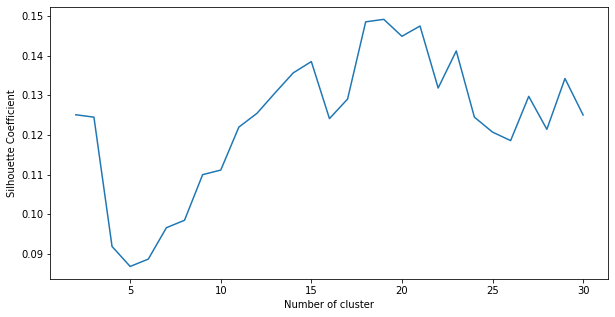

In [162]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silh = {}
homog = {}
for cluster in range(2, 31, 1):
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, 
                    n_jobs=-2).fit(ufcX)
    label = kmeans.labels_
    sil_coeff = silhouette_score(ufcX, label, metric='euclidean')
    homog_score = homogeneity_score(ufcY, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0, 0.5, 'Silhouette Coefficient')

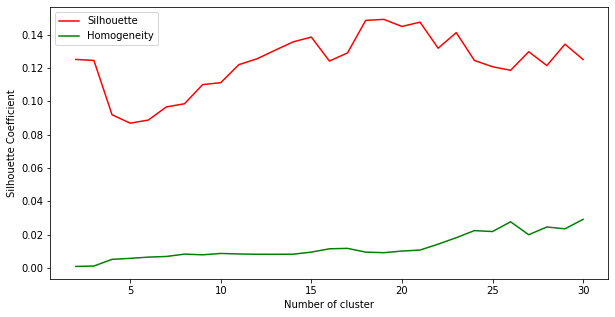

In [165]:
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

For n_clusters=2, The Silhouette Coefficient is 0.1825431238879885
For n_clusters=2, The homogeneity_score is 0.287635849409306
For n_clusters=3, The Silhouette Coefficient is 0.19275253024057112
For n_clusters=3, The homogeneity_score is 0.6522730009801139
For n_clusters=4, The Silhouette Coefficient is 0.15358331962956046
For n_clusters=4, The homogeneity_score is 0.6514440414584809
For n_clusters=5, The Silhouette Coefficient is 0.14175913802587314
For n_clusters=5, The homogeneity_score is 0.6654514966752896
For n_clusters=6, The Silhouette Coefficient is 0.10631386763842701
For n_clusters=6, The homogeneity_score is 0.667823386094299
For n_clusters=7, The Silhouette Coefficient is 0.10695187760271324
For n_clusters=7, The homogeneity_score is 0.6636528360239929
For n_clusters=8, The Silhouette Coefficient is 0.09193399508011514
For n_clusters=8, The homogeneity_score is 0.6563433247103977
For n_clusters=9, The Silhouette Coefficient is 0.08849493265353889
For n_clusters=9, The hom

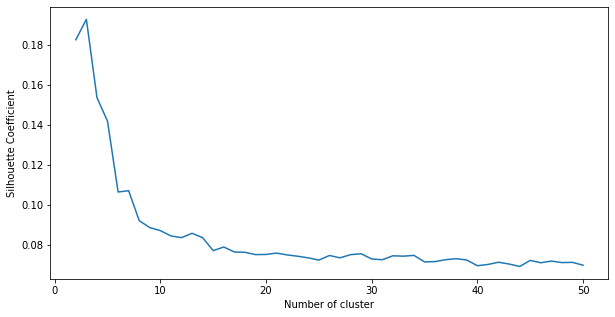

In [170]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silh_wine = {}
homog_wine = {}
for cluster in range(2, 51, 1):
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, 
                    n_jobs=-2).fit(wineX)
    label = kmeans.labels_
    sil_coeff = silhouette_score(wineX, label, metric='euclidean')
    homog_score = homogeneity_score(wineY, (label+1))
    silh_wine[cluster] = sil_coeff
    homog_wine[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh_wine.keys()), list(silh_wine.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0, 0.5, 'Silhouette Coefficient')

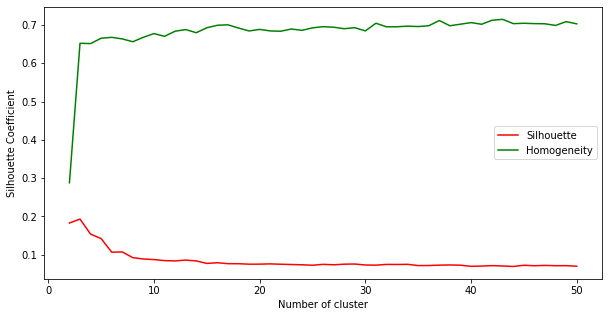

In [171]:
plt.figure()
plt.plot(list(silh_wine.keys()), list(silh_wine.values()), 'r', label="Silhouette")
plt.plot(list(homog_wine.keys()), list(homog_wine.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

# EXPECTATION MAXIMIZATION

For n_clusters=2, The Silhouette Coefficient is 0.07099175808853044
For n_clusters=2, The homogeneity_score is 0.0032235388825107535
For n_clusters=2, The log_likelihood score is 336.21819179018394
For n_clusters=3, The Silhouette Coefficient is 0.07717695719689592
For n_clusters=3, The homogeneity_score is 0.006018773949133797
For n_clusters=3, The log_likelihood score is 349.0115553820528
For n_clusters=4, The Silhouette Coefficient is 0.08594980916081373
For n_clusters=4, The homogeneity_score is 0.004077127890057054
For n_clusters=4, The log_likelihood score is 348.81403970952147
For n_clusters=5, The Silhouette Coefficient is 0.08826425868499362
For n_clusters=5, The homogeneity_score is 0.00962525805279432
For n_clusters=5, The log_likelihood score is 359.5787680197086
For n_clusters=6, The Silhouette Coefficient is 0.09043892327828185
For n_clusters=6, The homogeneity_score is 0.0074970186513399865
For n_clusters=6, The log_likelihood score is 359.40596683213755
For n_clusters=7

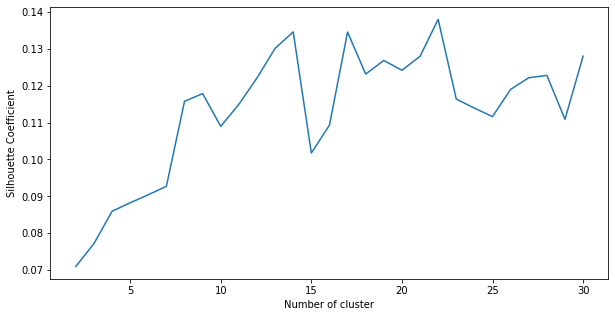

In [166]:
# UFC dataset on EM
silh_EM = {}
homog_EM = {}
log_likelihood_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(ufcX)
    label = gmm.predict(ufcX)
    sil_coeff = silhouette_score(ufcX, label, metric='euclidean')
    homog_score = homogeneity_score(ufcY, label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = gmm.score(ufcX)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0, 0.5, 'Silhouette Coefficient')

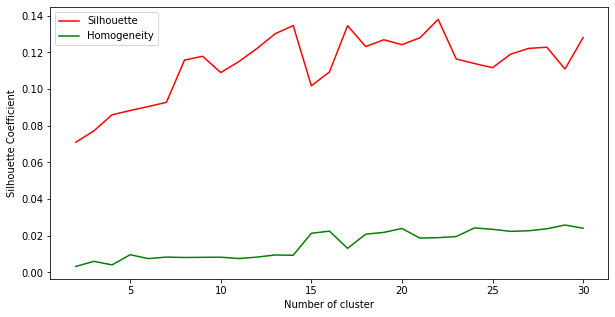

In [167]:
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()), 'r', label="Silhouette")
plt.plot(list(homog_EM.keys()), list(homog_EM.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

For n_clusters=2, The Silhouette Coefficient is 0.16455334570824817
For n_clusters=2, The homogeneity_score is 0.31470646345316977
For n_clusters=2, The log_likelihood score is 4.757311068514164
For n_clusters=3, The Silhouette Coefficient is 0.17173600268564923
For n_clusters=3, The homogeneity_score is 0.6052631761692003
For n_clusters=3, The log_likelihood score is 4.993532152782335
For n_clusters=4, The Silhouette Coefficient is 0.12954160083659855
For n_clusters=4, The homogeneity_score is 0.5701768616817885
For n_clusters=4, The log_likelihood score is 5.317778348412211
For n_clusters=5, The Silhouette Coefficient is 0.092860697320813
For n_clusters=5, The homogeneity_score is 0.5501068321274648
For n_clusters=5, The log_likelihood score is 5.4765176452105235
For n_clusters=6, The Silhouette Coefficient is 0.07351546076291199
For n_clusters=6, The homogeneity_score is 0.6164312412796972
For n_clusters=6, The log_likelihood score is 5.571221578029143
For n_clusters=7, The Silhouet

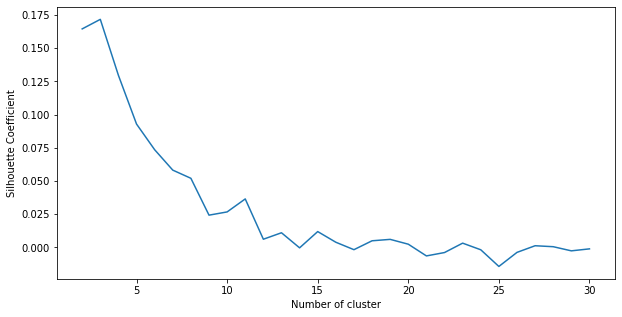

In [174]:
# Wine dataset on EM
silh_wine_EM = {}
homog_wine_EM = {}
log_likelihood_wine_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(wineX)
    label = gmm.predict(wineX)
    sil_coeff = silhouette_score(wineX, label, metric='euclidean')
    homog_score = homogeneity_score(wineY, label)
    silh_wine_EM[cluster] = sil_coeff
    homog_wine_EM[cluster] = homog_score
    log_likelihood_wine_EM[cluster] = gmm.score(wineX)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_wine_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_wine_EM.keys()), list(silh_wine_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0, 0.5, 'Silhouette Coefficient')

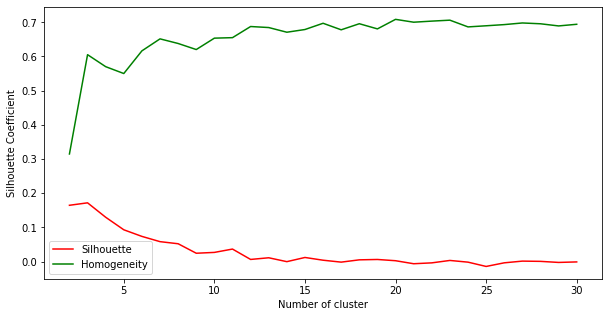

In [176]:
plt.figure()
plt.plot(list(silh_wine_EM.keys()), list(silh_wine_EM.values()), 'r', label="Silhouette")
plt.plot(list(homog_wine_EM.keys()), list(homog_wine_EM.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

## Compare classes on EM

In [85]:
gmm = GaussianMixture(n_components=2, max_iter=100, random_state=44, 
                      n_init=5).fit(ufcX)
label = gmm.predict(ufcX)
accuracy_score((1-label), ufcY)

0.5019487750556793

In [107]:
gmm = GaussianMixture(n_components=3, max_iter=100, random_state=44, 
                      n_init=5).fit(wineX)
label = gmm.predict(wineX)
label[label==0] = 3
label[label==1] = 0
label[label==3] = 1
accuracy_score((label+1), wineY)

0.5648

# NEURAL NETWORK ON WINE DATASET

## KMeans

In [209]:
kmeans = KMeans(n_clusters=15, n_init=50, max_iter=1000, random_state=44, 
                n_jobs=-2).fit(wineX)
label = kmeans.labels_

In [210]:
X_kmeans = label.reshape(5000,1)

In [211]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier()
neural_net.fit(X_kmeans, wineY)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [212]:
# first net results
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
ufc_train_predictions = neural_net.predict(X_kmeans)
accuracy = accuracy_score(wineY, ufc_train_predictions)
print(accuracy)
print(classification_report(wineY, ufc_train_predictions))

0.6444
              precision    recall  f1-score   support

           1       0.83      0.42      0.56      1577
           2       0.54      0.96      0.69      2013
           3       0.97      0.45      0.61      1410

    accuracy                           0.64      5000
   macro avg       0.78      0.61      0.62      5000
weighted avg       0.75      0.64      0.63      5000



In [204]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neural_net, X_kmeans, wineY,
                         scoring="f1_weighted", cv=10)
scores, scores.mean()

(array([0.36667514, 0.41098363, 0.36018896, 0.32794083, 0.42635724,
        0.41087588, 0.4168688 , 0.32622266, 0.39112623, 0.37031332]),
 0.38075526815149596)

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kmeans, 
                                                    wineY, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify=wineY)

In [214]:
# stratified cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X[train_index, :]
            train_y_folds = train_y[train_index]
            test_X_fold = train_X[test_index, :]
            test_y_fold = train_y[test_index]
            classifier.fit(train_X_folds, train_y_folds)
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

In [215]:
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [216]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

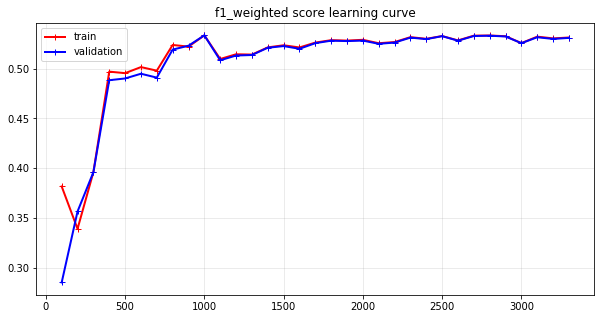

In [217]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, neural_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [218]:
# start with the best net from Assignment 1
best_net = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

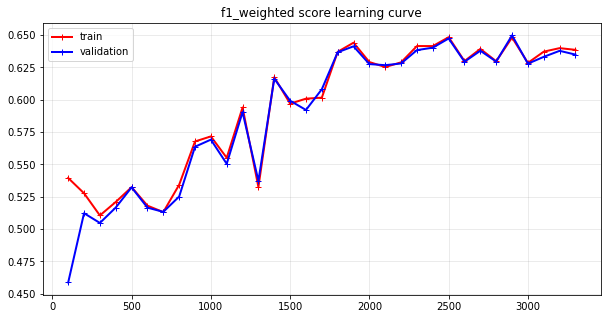

In [219]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [221]:
# start with the best net from Assignment 1
best_net = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

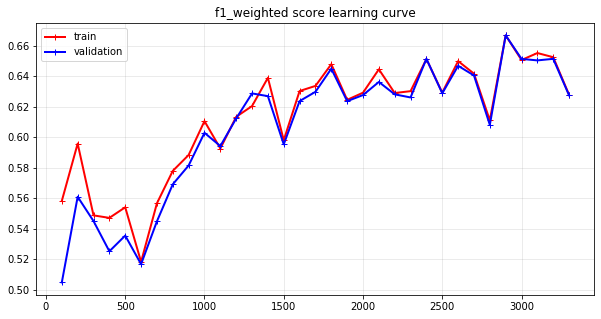

In [222]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [223]:
from sklearn.metrics import confusion_matrix
best_net.fit(X_train, y_train)
test_predictions = best_net.predict(X_test)
print(classification_report(y_test, test_predictions, digits=5))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           1    0.79779   0.41651   0.54729       521
           2    0.58302   0.94127   0.72005       664
           3    0.93464   0.61505   0.74189       465

    accuracy                        0.68364      1650
   macro avg    0.77182   0.65761   0.66974      1650
weighted avg    0.74993   0.68364   0.67165      1650

[[217 296   8]
 [ 27 625  12]
 [ 28 151 286]]


## EM Algorithm

In [224]:
gmm = GaussianMixture(n_components=15, max_iter=100, random_state=44, 
                      n_init=5).fit(wineX)
label = gmm.predict(wineX)

In [225]:
X_em = label.reshape(5000,1)

In [226]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier()
neural_net.fit(X_em, wineY)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [227]:
# first net results
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
ufc_train_predictions = neural_net.predict(X_em)
accuracy = accuracy_score(wineY, ufc_train_predictions)
print(accuracy)
print(classification_report(wineY, ufc_train_predictions))

0.7662
              precision    recall  f1-score   support

           1       0.72      0.58      0.64      1577
           2       0.70      0.85      0.77      2013
           3       0.94      0.86      0.90      1410

    accuracy                           0.77      5000
   macro avg       0.79      0.76      0.77      5000
weighted avg       0.77      0.77      0.76      5000



In [228]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neural_net, X_em, wineY,
                         scoring="f1_weighted", cv=10)
scores, scores.mean()

(array([0.74321342, 0.77968821, 0.74702248, 0.76160747, 0.77927872,
        0.73462371, 0.72865853, 0.69853476, 0.77165911, 0.7901869 ]),
 0.7534473303378937)

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_em, 
                                                    wineY, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify=wineY)

In [230]:
# stratified cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X[train_index, :]
            train_y_folds = train_y[train_index]
            test_X_fold = train_X[test_index, :]
            test_y_fold = train_y[test_index]
            classifier.fit(train_X_folds, train_y_folds)
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

In [231]:
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [232]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

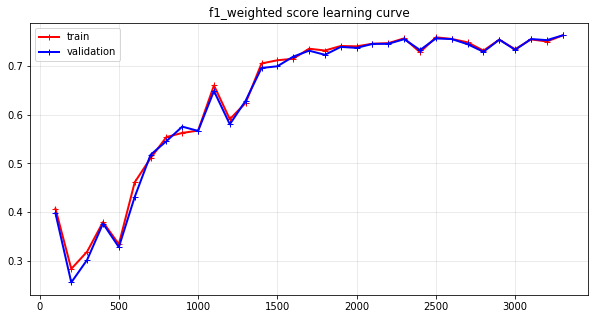

In [233]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, neural_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [234]:
# start with the best net from Assignment 1
best_net = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

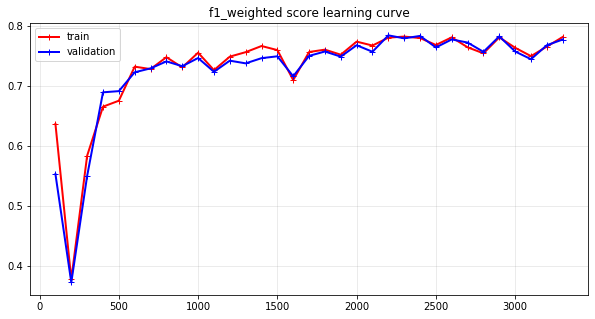

In [235]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [236]:
# start with the best net from Assignment 1
best_net = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

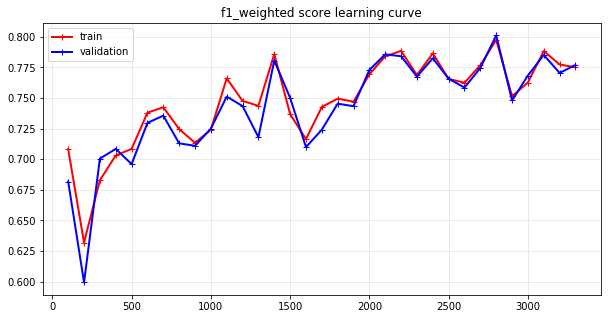

In [237]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [238]:
from sklearn.metrics import confusion_matrix
best_net.fit(X_train, y_train)
test_predictions = best_net.predict(X_test)
print(classification_report(y_test, test_predictions, digits=5))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           1    0.72495   0.76392   0.74393       521
           2    0.78924   0.79518   0.79220       664
           3    0.93519   0.86882   0.90078       465

    accuracy                        0.80606      1650
   macro avg    0.81646   0.80930   0.81230      1650
weighted avg    0.81007   0.80606   0.80756      1650

[[398 114   9]
 [117 528  19]
 [ 34  27 404]]
